<a href="https://colab.research.google.com/github/mudesir/DS-Unit-1-Build/blob/master/Mudesir_Suleyman_TL_Serina_DS17_Build_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook provides recipes for loading and saving data from external sources.

#DS Unit 1 Build
# South African Heart Disease Study

Data from https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data

Description of the columns header:

1. sbp: systolic blood pressure
2. tobacco: cumulative tobacco (kg)
3. ldl: low densiity lipoprotein cholesterol
4. adiposity
5. famhist: family history of heart disease (Present,  Absent)
6. typea: type-A behavior
7. obesity
8. alcohol: current alcohol consumption
9. age: age at onset
10. chd: coronary heart disease

### Exploratory Data Analysis

In [1]:
import pandas as pd
df = pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data')
df.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [ ]:
df.shape

(462, 11)

In [ ]:
df.isnull().sum()

row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [2]:
# the column row.names is not iportant I will drop it
df = df.drop('row.names', axis=1)
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [3]:
# check data type
df.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

In [4]:
# the famhist data type object we have to change into number, replace "Present" to 1 
# and  "Absent" to 0
df = df.replace({'Present': 1, 'Absent':0})
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [ ]:
df.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist        int64
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

In [ ]:
df['age']

0      52
1      63
2      46
3      58
4      49
       ..
457    58
458    52
459    55
460    40
461    46
Name: age, Length: 462, dtype: int64

In [5]:
df.describe()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,0.415584,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,0.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


In [6]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  x_bar = np.mean(data)
  n = len(data)
  s = np.std(data, ddof=1)
  std_err = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*std_err
  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error
  return (lower_bound, x_bar, upper_bound)

In [7]:
#  confidence interval for sbp: systolic blood pressure data
import numpy as np
from scipy import stats
data = df['sbp']
confidence_interval(data, confidence=.95)

(136.45294750470532, 138.32683982683983, 140.20073214897434)

In [8]:
# lets make the sbp: systolic blood pressure data group for sbp lessthan the 
#lower bound, between the lower and upper bound and above the upper bound 

df.loc[df['sbp'] <= 134.5, 'sbpgroup'] = 0 
df.loc[(df['sbp'] > 134.5) & (df['sbp']<=138.3), 'sbpgroup'] = 1
df.loc[df['sbp'] > 138.3, 'sbpgroup'] = 2  
df['sbpgroup'].value_counts()

0.0    242
2.0    172
1.0     48
Name: sbpgroup, dtype: int64

In [9]:
# confidence interval for tobacco data
data = df['tobacco']
confidence_interval(data, confidence=.95)

(3.2157284213322077, 3.635649350649351, 4.055570279966494)

In [10]:
# lets make the tobacco data group for tobacco lessthan the 
#lower bound, between the lower and upper bound and above the upper bound 

df.loc[df['tobacco'] <= 3.2, 'tobaccogroup'] = 0 
df.loc[(df['tobacco'] > 3.2) & (df['tobacco']<=4.1), 'tobaccogroup'] = 1
df.loc[df['tobacco'] > 4.1, 'tobaccogroup'] = 2  
df['tobaccogroup'].value_counts()

0.0    276
2.0    158
1.0     28
Name: tobaccogroup, dtype: int64

In [11]:
# confidence interval for ldl: low densiity lipoprotein cholesterol data
data = df['ldl']
confidence_interval(data, confidence=.95)

(4.550990135683968, 4.740324675324675, 4.9296592149653815)

In [12]:
# lets make the ldl: low densiity lipoprotein cholesterol data group for ldl lessthan the 
#lower bound, between the lower and upper bound and above the upper bound 

df.loc[df['ldl'] <= 3.2, 'ldlgroup'] = 0 
df.loc[(df['ldl'] > 3.2) & (df['ldl']<=4.1), 'ldlgroup'] = 1
df.loc[df['ldl'] > 4.1, 'ldlgroup'] = 2  
df['ldlgroup'].value_counts()

2.0    259
0.0    109
1.0     94
Name: ldlgroup, dtype: int64

In [ ]:
# confidence interval for adiposity data
data = df['adiposity']
confidence_interval(data, confidence=.95)

(24.695374959717974, 25.4067316017316, 26.118088243745227)

In [13]:
# lets make the adiposity data group for adiposity lessthan the 
#lower bound, between the lower and upper bound and above the upper bound 

df.loc[df['adiposity'] <= 24.7, 'adipositygroup'] = 0 
df.loc[(df['adiposity'] > 24.7) & (df['adiposity']<=26.1), 'adipositygroup'] = 1
df.loc[df['adiposity'] > 26.1, 'adipositygroup'] = 2  
df['adipositygroup'].value_counts()

2.0    231
0.0    200
1.0     31
Name: adipositygroup, dtype: int64

In [14]:
# confidence interval for typea: type-A behavior data
data = df['typea']
confidence_interval(data, confidence=.95)

(52.206320132369555, 53.103896103896105, 54.001472075422654)

In [15]:
# lets make the typea: type-A behavior data group for typea lessthan the 
#lower bound, between the lower and upper bound and above the upper bound 

df.loc[df['typea'] <= 24.7, 'typeagroup'] = 0 
df.loc[(df['typea'] > 24.7) & (df['typea']<=26.1), 'typeagroup'] = 1
df.loc[df['typea'] > 26.1, 'typeagroup'] = 2  
df['typeagroup'].value_counts()

2.0    458
1.0      2
0.0      2
Name: typeagroup, dtype: int64

In [16]:
# confidence interval for obesity data
data = df['obesity']
confidence_interval(data, confidence=.95)

(25.65887344225081, 26.04411255411255, 26.429351665974295)

In [17]:
# lets make the obesity data group for obesity lessthan the 
#lower bound, between the lower and upper bound and above the upper bound 

df.loc[df['obesity'] <= 24.7, 'obesitygroup'] = 0 
df.loc[(df['obesity'] > 24.7) & (df['obesity']<=26.1), 'obesitygroup'] = 1
df.loc[df['obesity'] > 26.1, 'obesitygroup'] = 2  
df['obesitygroup'].value_counts()

2.0    211
0.0    179
1.0     72
Name: obesitygroup, dtype: int64

In [18]:
# confidence interval for alcohol: current alcohol consumption data
data = df['alcohol']
confidence_interval(data, confidence=.95)

(14.806193411597087, 17.044393939393935, 19.282594467190783)

In [19]:
# lets make the alcohol: current alcohol consumption data group for alcohol lessthan the 
#lower bound, between the lower and upper bound and above the upper bound 

df.loc[df['alcohol'] <= 14.8, 'alcoholgroup'] = 0 
df.loc[(df['alcohol'] > 14.8) & (df['alcohol']<=19.3), 'alcoholgroup'] = 1
df.loc[df['alcohol'] > 19.3, 'alcoholgroup'] = 2  
df['alcoholgroup'].value_counts()

0.0    302
2.0    139
1.0     21
Name: alcoholgroup, dtype: int64

In [20]:
# confidence interval for age: age at onset data
data = df['age']
confidence_interval(data, confidence=.95)

(41.48038169516487, 42.816017316017316, 44.15165293686976)

In [21]:
# lets make the age group for age lessthan the lower bound, between the lower and upper
# bound and above the upper bound 

df.loc[df['age'] <= 42, 'agegroup'] = 0 
df.loc[(df['age'] > 42) & (df['age']<=44), 'agegroup'] = 1
df.loc[df['age'] > 44, 'agegroup'] = 2  
df['agegroup'].value_counts()      

2.0    235
0.0    211
1.0     16
Name: agegroup, dtype: int64

In [22]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,sbpgroup,tobaccogroup,ldlgroup,adipositygroup,typeagroup,obesitygroup,alcoholgroup,agegroup
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1,2.0,2.0,2.0,0.0,2.0,1.0,2.0,2.0
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1,2.0,0.0,2.0,2.0,2.0,2.0,0.0,2.0
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,2.0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1,0.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0


In [23]:
# New data set the facters which have effect on chd by grouping each data below
# the lower bound confidence interval, between the lower and upper level intervan
# and above the upper bound interval
df_new =df[['sbpgroup', 'tobaccogroup', 'ldlgroup', 'adipositygroup',
          'famhist', 'typeagroup', 'obesitygroup', 'alcoholgroup',
          'agegroup', 'chd']].copy() 
df_new.head(10)

,sbpgroup,tobaccogroup,ldlgroup,adipositygroup,famhist,typeagroup,obesitygroup,alcoholgroup,agegroup,chd
0,2.0,2.0,2.0,0.0,1,2.0,1.0,2.0,2.0,1
1,2.0,0.0,2.0,2.0,0,2.0,2.0,0.0,2.0,1
2,0.0,0.0,1.0,2.0,1,2.0,2.0,0.0,2.0,0
3,2.0,2.0,2.0,2.0,1,2.0,2.0,2.0,2.0,1
4,0.0,2.0,1.0,2.0,1,2.0,1.0,2.0,2.0,1
5,0.0,2.0,2.0,2.0,1,2.0,2.0,0.0,2.0,0
6,2.0,1.0,1.0,0.0,0,2.0,0.0,0.0,0.0,0
7,0.0,1.0,2.0,0.0,1,2.0,0.0,0.0,2.0,1
8,0.0,0.0,1.0,0.0,1,2.0,1.0,0.0,0.0,0
9,0.0,0.0,2.0,2.0,1,2.0,2.0,0.0,2.0,1


In [24]:
df_new.corr()

,sbpgroup,tobaccogroup,ldlgroup,adipositygroup,famhist,typeagroup,obesitygroup,alcoholgroup,agegroup,chd
sbpgroup,1.000000,0.191070,0.202644,0.249295,0.056831,0.017243,0.219585,0.130437,0.258839,0.161840
tobaccogroup,0.191070,1.000000,0.201370,0.254486,0.136412,0.007386,0.149525,0.252495,0.417942,0.247495
ldlgroup,0.202644,0.201370,1.000000,0.361916,0.151426,-0.036456,0.348445,-0.045947,0.244686,0.235587
adipositygroup,0.249295,0.254486,0.361916,1.000000,0.155514,0.036829,0.666578,0.118197,0.442777,0.208988
famhist,0.056831,0.136412,0.151426,0.155514,1.000000,0.014790,0.123211,0.032493,0.223936,0.272373
typeagroup,0.017243,0.007386,-0.036456,0.036829,0.014790,1.000000,0.006700,-0.001895,0.004692,0.002419
obesitygroup,0.219585,0.149525,0.348445,0.666578,0.123211,0.006700,1.000000,0.068174,0.265687,0.103867
alcoholgroup,0.130437,0.252495,-0.045947,0.118197,0.032493,-0.001895,0.068174,1.000000,0.090723,0.062167
agegroup,0.258839,0.417942,0.244686,0.442777,0.223936,0.004692,0.265687,0.090723,1.000000,0.313842
chd,0.161840,0.247495,0.235587,0.208988,0.272373,0.002419,0.103867,0.062167,0.313842,1.000000


In [25]:
df_new['agegroup'].value_counts()

2.0    235
0.0    211
1.0     16
Name: agegroup, dtype: int64

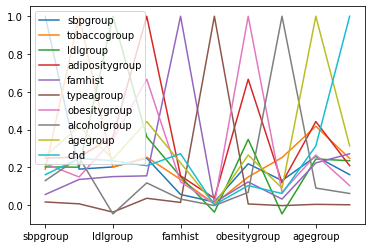

In [ ]:
df_new.corr().plot();


In [32]:
# crosstab for CHD and sbp group
small_df_cr=pd.crosstab(df['chd'], df['sbpgroup'])
small_df_cr

sbpgroup,0.0,1.0,2.0
chd,,,
0,174,33,95
1,68,15,77


In [34]:
# crosstab for CHD and tobacco group
small_df_cr=pd.crosstab(df['chd'], df['tobaccogroup'])
small_df_cr

tobaccogroup,0.0,1.0,2.0
chd,,,
0,206,18,78
1,70,10,80


In [33]:
# crosstab for CHD and ldl group
small_df_cr=pd.crosstab(df['chd'], df['ldlgroup'])
small_df_cr

ldlgroup,0.0,1.0,2.0
chd,,,
0,89,69,144
1,20,25,115


In [39]:
# crosstab for CHD and type a group
small_df_cr=pd.crosstab(df['chd'], df['typeagroup'])
small_df_cr

typeagroup,0.0,1.0,2.0
chd,,,
0,1,2,299
1,1,0,159


In [38]:
# crosstab for CHD and adioposity group
small_df_cr=pd.crosstab(df['chd'], df['adipositygroup'])
small_df_cr

adipositygroup,0.0,1.0,2.0
chd,,,
0,153,20,129
1,47,11,102


In [36]:
# crosstab for CHD and family history group
small_df_cr=pd.crosstab(df['chd'], df['famhist'])
small_df_cr

famhist,0,1
chd,,
0,206,96
1,64,96


In [40]:
# crosstab for CHD and obesity group
small_df_cr=pd.crosstab(df['chd'], df['obesitygroup'])
small_df_cr

obesitygroup,0.0,1.0,2.0
chd,,,
0,126,50,126
1,53,22,85


In [41]:
# crosstab for CHD and alcohol group
small_df_cr=pd.crosstab(df['chd'], df['alcoholgroup'])
small_df_cr

alcoholgroup,0.0,1.0,2.0
chd,,,
0,203,15,84
1,99,6,55


In [46]:
# crosstab for CHD and age group
small_df_cr=pd.crosstab(df['chd'], df['agegroup'])
small_df_cr

agegroup,0.0,1.0,2.0
chd,,,
0,171,12,119
1,40,4,116


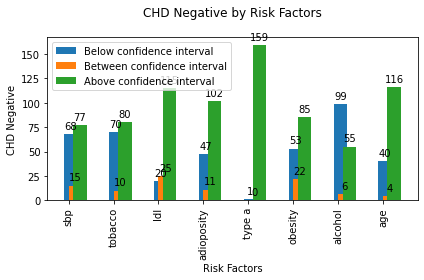

In [75]:
# plot for CHD negative
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['sbp', 'tobacco', 'ldl', 'adioposity', 'type a', 'obesity', 'alcohol', 'age']
chd_nve_under_lower_confinterval = [68, 70, 20, 47, 1, 53, 99, 40]
chd_nve_under_between_confinterval = [15, 10, 25, 11, 0, 22, 6,4]
chd_nve_over_upper_confinterval = [77, 80, 115, 102, 159, 85, 55, 116]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, chd_nve_under_lower_confinterval, width, label='Below confidence interval', align='edge')
rects2 = ax.bar(x, chd_nve_under_between_confinterval, width, label='Between confidence interval', align='edge')
rects3 = ax.bar(x + width/3, chd_nve_over_upper_confinterval, width, label='Above confidence interval', align='edge')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('CHD Negative')
ax.set_title("CHD Negative by Risk Factors\n")

ax.set_xticks(x)
ax.set_xticklabels(labels,rotation='vertical')
ax.set_xlabel('Risk Factors')
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.tight_layout()

plt.show()

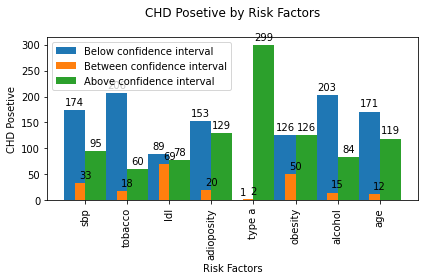

In [76]:
# plot for CHD posetive

labels = ['sbp', 'tobacco', 'ldl', 'adioposity', 'type a', 'obesity', 'alcohol', 'age']
chd_pve_under_lower_confinterval = [174, 206, 89, 153, 1, 126, 203, 171]
chd_pve_under_between_confinterval = [33, 18, 69, 20, 2, 50, 15,12]
chd_pve_over_upper_confinterval = [95, 60, 78, 129, 299, 126, 84, 119]

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, chd_pve_under_lower_confinterval, width, label='Below confidence interval')
rects2 = ax.bar(x, chd_pve_under_between_confinterval, width, label='Between confidence interval')
rects3 = ax.bar(x + width/2, chd_pve_over_upper_confinterval, width, label='Above confidence interval')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('CHD Posetive')
ax.set_title("CHD Posetive by Risk Factors\n")
ax.set_xlabel('Risk Factors')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation='vertical')
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.tight_layout()

plt.show()

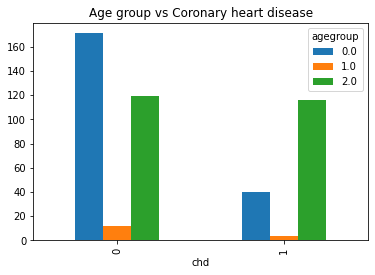

In [63]:
#
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# we have to see each features the crosstab with coronary heart disease
# age group ('0' means age<=42, '1' means 42< age <= 44 and '2' means age >44) 
# and coronary heart disease ('0' means absent and '1' means present)
small_df_cr=pd.crosstab(df['chd'], df['agegroup'])
small_df_cr.plot.bar()
plt.title('Age group vs Coronary heart disease')
plt.show()


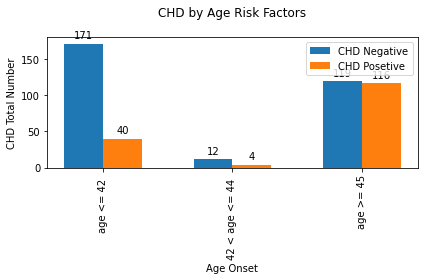

In [73]:
labels = ['age <= 42 ', '42 < age <= 44 ', 'age >= 45']
chd_nve = [171, 12, 119]
chd_pve = [40, 4, 116]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, chd_nve, width, label='CHD Negative')

rects2 = ax.bar(x + width/2, chd_pve, width, label='CHD Posetive')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('CHD Total Number')
ax.set_title("CHD by Age Risk Factors\n")
ax.set_xlabel('Age Onset')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation='vertical')

ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

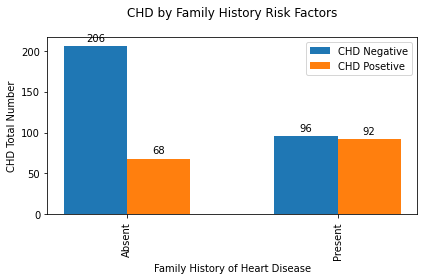

In [72]:
labels = ['Absent', 'Present']
chd_nve = [206, 96]
chd_pve = [68, 92]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, chd_nve, width, label='CHD Negative')

rects2 = ax.bar(x + width/2, chd_pve, width, label='CHD Posetive')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('CHD Total Number')
ax.set_title("CHD by Family History Risk Factors\n")
ax.set_xlabel('Family History of Heart Disease')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation='vertical')

ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [ ]:
chd_negative = df_new[df_new['chd']==0]
chd_negative.head()

,sbpgroup,tobaccogroup,ldlgroup,adipositygroup,famhist,typeagroup,obesitygroup,alcoholgroup,agegroup,chd
2,0.0,0.0,1.0,2.0,1,2.0,2.0,0.0,2.0,0
5,0.0,2.0,2.0,2.0,1,2.0,2.0,0.0,2.0,0
6,2.0,1.0,1.0,0.0,0,2.0,0.0,0.0,0.0,0
8,0.0,0.0,1.0,0.0,1,2.0,1.0,0.0,0.0,0
12,0.0,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0


In [ ]:
chd_posetive = df_new[df_new['chd']==1]
chd_posetive.head()

,sbpgroup,tobaccogroup,ldlgroup,adipositygroup,famhist,typeagroup,obesitygroup,alcoholgroup,agegroup,chd
0,2.0,2.0,2.0,0.0,1,2.0,1.0,2.0,2.0,1
1,2.0,0.0,2.0,2.0,0,2.0,2.0,0.0,2.0,1
3,2.0,2.0,2.0,2.0,1,2.0,2.0,2.0,2.0,1
4,0.0,2.0,1.0,2.0,1,2.0,1.0,2.0,2.0,1
7,0.0,1.0,2.0,0.0,1,2.0,0.0,0.0,2.0,1


# Statistical Test

Two sample t-test on systolic blood pressure  coronary heart disease posetive more than  coronary heart disease negative

1. Null Hypothhesis: coronary  heart disease negative is  the same as  coronary heart disease posetive on systolic blood pressure 
 $H_0: \bar{x}_n = \bar{x}_p$
2. Alternative Hypothesis:  coronary heart disease negative is  not the same as  coronary heart disease posetive  on systolic blood pressure  
$H_a: \bar{x}_n != \bar{x}_p$ 
3. Confidence level: 95%

In [ ]:
# systolic blood pressure (sbp)
from scipy import stats
stats.ttest_ind(chd_negative['sbpgroup'], chd_posetive['sbpgroup'])

Ttest_indResult(statistic=-3.5174489830265805, pvalue=0.000478985312531083)

**Conclusion**: Given a t-statistic of -3.5, and p-value of 0, we reject the null hypothesis that coronary heart disease negative is the same as coronary heart disease posetive on systolic blood pressure. This suggests the alternative that they are not the same on systolic blood pressure. From the t-statistics sign the average systolic blood pressure for coronary heart disease posetive is bigger.

Two sample t-test on tobacco  coronary heart disease posetive more than  coronary heart disease negative

1. Null Hypothhesis: coronary  heart disease negative is  the same as  coronary heart disease posetive on tobacco 
 $H_0: \bar{x}_n = \bar{x}_p$
2. Alternative Hypothesis:  coronary heart disease negative is  not the same as  coronary heart disease posetive  on tobacco  
$H_a: \bar{x}_n != \bar{x}_p$ 
3. Confidence level: 95%

In [ ]:
# tobacco
from scipy import stats
stats.ttest_ind(chd_negative['tobaccogroup'], chd_posetive['tobaccogroup'])

Ttest_indResult(statistic=-5.478631171393912, pvalue=7.070434779990596e-08)

**Conclusion**: Given a t-statistic of -5.5, and p-value of 0, we reject the null hypothesis that coronary heart disease negative is the same as coronary heart disease posetive on tobacco. This suggests the alternative that they are not the same on tobacco consumption. From the t-statistics sign the average tobacco consumption for coronary heart disease posetive is bigger.

Two sample t-test on low densiity lipoprotein cholesterol  coronary heart disease posetive more than  coronary heart disease negative

1. Null Hypothhesis: coronary  heart disease negative is  the same as  coronary heart disease posetive on low densiity lipoprotein cholesterol 
 $H_0: \bar{x}_n = \bar{x}_p$
2. Alternative Hypothesis:  coronary heart disease negative is  not the same as  coronary heart disease posetive  on low densiity lipoprotein cholesterol  
$H_a: \bar{x}_n != \bar{x}_p$ 
3. Confidence level: 95%

In [ ]:
#ldl: low density lipoprotein
stats.ttest_ind(chd_negative['ldlgroup'], chd_posetive['ldlgroup'])

Ttest_indResult(statistic=-5.199121905210358, pvalue=3.0181377247453295e-07)

**Conclusion**: Given a t-statistic of -5.2, and p-value of 0, we reject the null hypothesis that coronary heart disease negative is the same as coronary heart disease posetive on ldl: low density lipoprotein. This suggests the alternative that they are not the same on ldl: low density lipoprotein. From the t-statistics sign the average ldl: low density lipoprotein for coronary heart disease posetive is bigger.

Two sample t-test on adiposity coronary heart disease posetive more than  coronary heart disease negative

1. Null Hypothhesis: coronary  heart disease negative is  the same as  coronary heart disease posetive on adiposity 
 $H_0: \bar{x}_n = \bar{x}_p$
2. Alternative Hypothesis:  coronary heart disease negative is  not the same as  coronary heart disease posetive on adiposity
$H_a: \bar{x}_n != \bar{x}_p$ 
3. Confidence level: 95%

In [ ]:
# adiposity
stats.ttest_ind(chd_negative['adipositygroup'], chd_posetive['adipositygroup'])

Ttest_indResult(statistic=-4.5834987219730206, pvalue=5.89924313037906e-06)


**Conclusion**: Given a t-statistic of -5.2, and p-value of 0, we reject the null hypothesis that coronary heart disease negative is the same as coronary heart disease posetive on adiposity. This suggests the alternative that they are not the same on adiposity. From the t-statistics sign the average adiposity for coronary heart disease posetive is bigger.


Two sample t-test on famhist: family history of heart disease (Present, Absent) coronary heart disease posetive more than  coronary heart disease negative

1. Null Hypothhesis: coronary  heart disease negative is  the same as  coronary heart disease posetive on famhist: family history of heart disease (Present, Absent) 
 $H_0: \bar{x}_n = \bar{x}_p$
2. Alternative Hypothesis:  coronary heart disease negative is  not the same as  coronary heart disease posetive on famhist: family history of heart disease (Present, Absent)
$H_a: \bar{x}_n != \bar{x}_p$ 
3. Confidence level: 95%

In [ ]:
# famhist: family history of heart disease (Present, Absent)
stats.ttest_ind(chd_negative['famhist'], chd_posetive['famhist'])

Ttest_indResult(statistic=-6.071288544960015, pvalue=2.6576285226962867e-09)

**Conclusion**: Given a t-statistic of -6.1, and p-value of 0, we reject the null hypothesis that coronary heart disease negative is the same as coronary heart disease posetive on famhist: family history of heart disease (Present, Absent). This suggests the alternative that they are not the same on famhist: family history of heart disease (Present, Absent). From the t-statistics sign the average famhist: family history of heart disease (Present, Absent) for coronary heart disease posetive is bigger.

Two sample t-test on typea: type-A behavior coronary heart disease posetive more than  coronary heart disease negative

1. Null Hypothhesis: coronary  heart disease negative is  the same as  coronary heart disease posetive on typea: type-A behavior 
 $H_0: \bar{x}_n = \bar{x}_p$
2. Alternative Hypothesis:  coronary heart disease negative is  not the same as  coronary heart disease posetive on typea: type-A behavior
$H_a: \bar{x}_n != \bar{x}_p$ 
3. Confidence level: 95%

In [40]:
# typea: type-A behavior
stats.ttest_ind(chd_negative['typeagroup'], chd_posetive['typeagroup'])

Ttest_indResult(statistic=-0.051879635946935676, pvalue=0.9586471213636275)

**Conclusion**: Given a t-statistic of -6.1, and p-value of 0.96, we fail to reject the null hypothesis that coronary heart disease negative is the same as coronary heart disease posetive on typea: type-A behavior. THey are statistically the same. From the t-statistics sign the average typea: type-A behavior for coronary heart disease posetive is bigger.

Two sample t-test on obesity coronary heart disease posetive more than  coronary heart disease negative

1. Null Hypothhesis: coronary  heart disease negative is  the same as  coronary heart disease posetive on obesity 
 $H_0: \bar{x}_n = \bar{x}_p$
2. Alternative Hypothesis:  coronary heart disease negative is  not the same as  coronary heart disease posetive on obesity
$H_a: \bar{x}_n != \bar{x}_p$ 
3. Confidence level: 95%

In [41]:
# obesity
stats.ttest_ind(chd_negative['obesitygroup'], chd_posetive['obesitygroup'])

Ttest_indResult(statistic=-2.239814682832712, pvalue=0.025579884302771107)

**Conclusion**: Given a t-statistic of -2.2, and p-value of 0.03, we reject the null hypothesis that coronary heart disease negative is the same as coronary heart disease posetive on obesity. This suggests the alternative that they are not the same on obesity. From the t-statistics sign the average obesity for coronary heart disease posetive is bigger.

Two sample t-test on alcohol: current alcohol consumption coronary heart disease posetive more than  coronary heart disease negative

1. Null Hypothhesis: coronary  heart disease negative is  the same as  coronary heart disease posetive on alcohol: current alcohol consumption 
 $H_0: \bar{x}_n = \bar{x}_p$
2. Alternative Hypothesis:  coronary heart disease negative is  not the same as  coronary heart disease posetive on alcohol: current alcohol consumption
$H_a: \bar{x}_n != \bar{x}_p$ 
3. Confidence level: 95%

In [42]:
#alcohol: current alcohol consumption
stats.ttest_ind(chd_negative['alcoholgroup'], chd_posetive['alcoholgroup'])

Ttest_indResult(statistic=-1.3359075086154328, pvalue=0.18224003986113624)

**Conclusion**: Given a t-statistic of -1.3, and p-value of 0.18, we fail to reject the null hypothesis that coronary heart disease negative is the same as coronary heart disease posetive on alcohol: current alcohol consumption. THey are statistically the same. From the t-statistics sign the average alcohol: current alcohol consumption for coronary heart disease posetive is bigger.

Two sample t-test on age: age at onset coronary heart disease posetive more than  coronary heart disease negative

1. Null Hypothhesis: coronary  heart disease negative is  the same as  coronary heart disease posetive on age: age at onset 
 $H_0: \bar{x}_n = \bar{x}_p$
2. Alternative Hypothesis:  coronary heart disease negative is  not the same as  coronary heart disease posetive on age: age at onset
$H_a: \bar{x}_n != \bar{x}_p$ 
3. Confidence level: 95%

In [43]:
#age: age at onset
stats.ttest_ind(chd_negative['agegroup'], chd_posetive['agegroup'])

Ttest_indResult(statistic=-7.089359280211076, pvalue=5.103180619783326e-12)

**Conclusion**: Given a t-statistic of -7.1, and p-value of 0, we reject the null hypothesis that coronary heart disease negative is the same as coronary heart disease posetive on age: age at onset. This suggests the alternative that they are not the same on age: age at onset. From the t-statistics sign the average age: age at onset for coronary heart disease posetive is bigger.

# Summary and Conclusion

From above we have seen that the data analysis and the visualization of the data set, we clearly see the distrbution of each feature with CHD, we see the table of a correlation for the data set. Depending on the result of the correlation table I take the first five high value of correlation coefficient of CHD and other risk factors. So, from nine risk factors of CHD we took five of them ('age', 'low density lipoprotein','family history', 'tobacco', 'adiposity') and create a new data set. According to our 2-sample t-test all the risk factors show the null hypothesis that is the average value of CHD negative is the same as the average value of CHD posetive is rejected for all five risk factors, which implies the average value of CHD negative is not the same as the average value of CHD posetive. On the other hand, the sign of the t-statistics shows as the average value for CHD posetive is greater than CHD neagative. The higher the t-statistics shows us the net difference between the means are high. From our t-test for five risk factors the t-statistics value of age and CHD is higher than others and also age and CHD has the higher correlation coefficient value than other risk factors. From the total 462 samples 38.1% are posetive for CHD test and the rest 61.9% are negative. For the risk factors most of the factors which are above the avarage or the normality they have the chance to have CHD, the bar graphs above for each factors will give us more estimate.